Prediction of Default of Credit Card


Content

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

#importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from prettytable import PrettyTable

In [2]:
# Sklearn model delection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Sklearn metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
# Sklearn models
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import LinearRegression

import random

%matplotlib inline

# Make results reproducible
random.seed(100)

In [3]:
#shuffling dataset and splitting function
def train_validate_test_split(df2, train_percent=.6, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df2.index)
    m = len(df2.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df2.iloc[perm[:train_end]]
    validate = df2.iloc[perm[train_end:validate_end]]
    test = df2.iloc[perm[validate_end:]]
    return train, validate, test

#Uploading Dataset

In [4]:
df = pd.read_excel(r'C:\Users\Giridhar Boyana\Desktop\Predicting default of credit card\TaiwanCreditDefaults.xls', header = 1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [7]:
category_features = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5','PAY_6']
number_features = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
target = ['default payment next month']

In [8]:
print(df[number_features].describe())

            LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    2.666250e+03    2326.750000    

In [9]:
for col in category_features:
    df[col] = df[col].astype('category')
print(df[category_features].describe())

          SEX  EDUCATION  MARRIAGE  PAY_0  PAY_2  PAY_2  PAY_3  PAY_4  PAY_5  \
count   30000      30000     30000  30000  30000  30000  30000  30000  30000   
unique      2          7         4     11     11     11     11     11     10   
top         2          2         2      0      0      0      0      0      0   
freq    18112      14030     15964  14737  15730  15730  15764  16455  16947   

        PAY_6  
count   30000  
unique     10  
top         0  
freq    16286  


#checking for missing values

In [10]:
df.isnull().any()

ID                            False
LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                         False
PAY_2                         False
PAY_3                         False
PAY_4                         False
PAY_5                         False
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month    False
dtype: bool

In [11]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

Exploratory Data Analysis

Count Plots

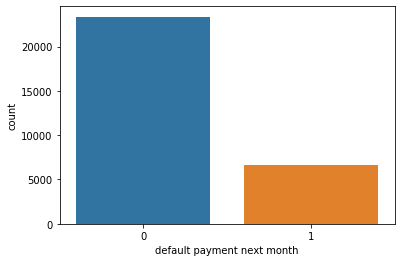

In [12]:
sns.countplot(df['default payment next month'])

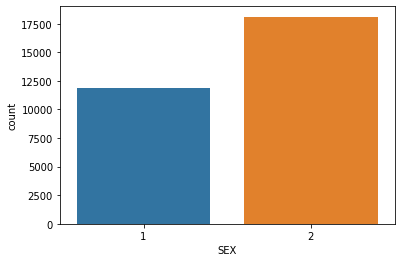

In [13]:
sns.countplot(df['SEX'])

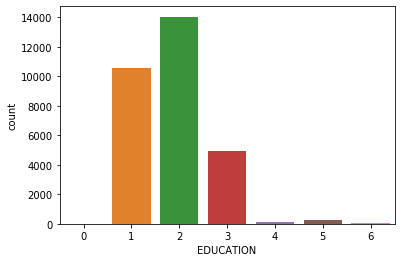

In [14]:
sns.countplot(df['EDUCATION'])

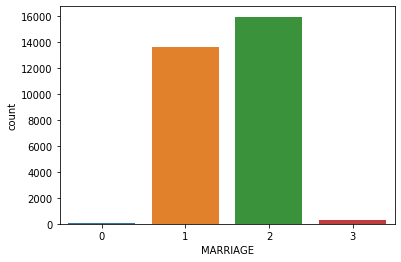

In [15]:
sns.countplot(df['MARRIAGE'])

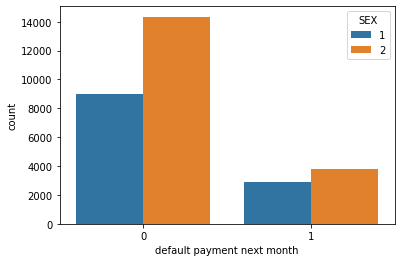

In [16]:
sns.countplot(df['default payment next month'],hue=df['SEX'])

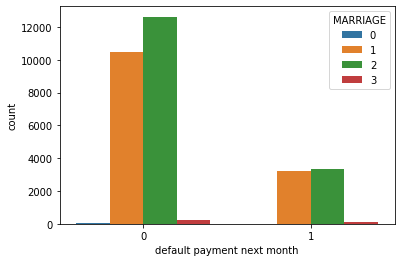

In [17]:
sns.countplot(df['default payment next month'],hue=df['MARRIAGE'])

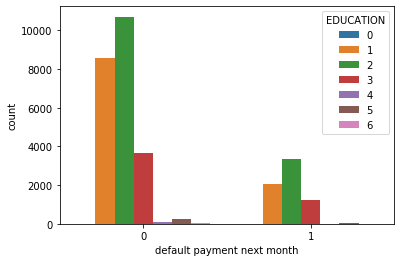

In [18]:
sns.countplot(df['default payment next month'],hue=df['EDUCATION'])

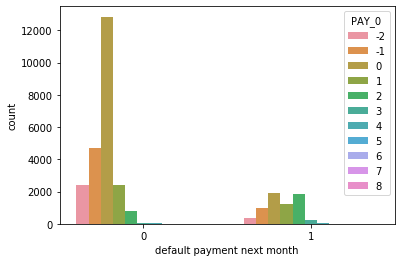

In [19]:
sns.countplot(df['default payment next month'],hue=df['PAY_0'])

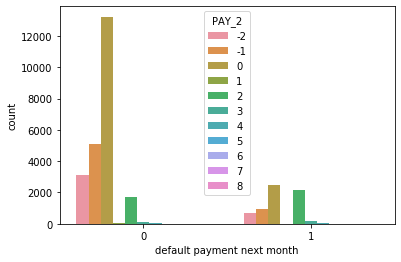

In [20]:
sns.countplot(df['default payment next month'],hue=df['PAY_2'])

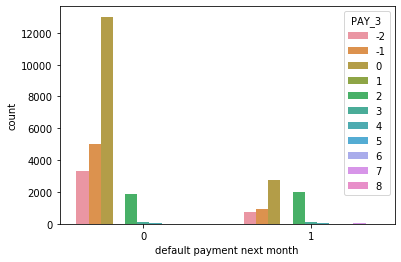

In [21]:
sns.countplot(df['default payment next month'],hue=df['PAY_3'])

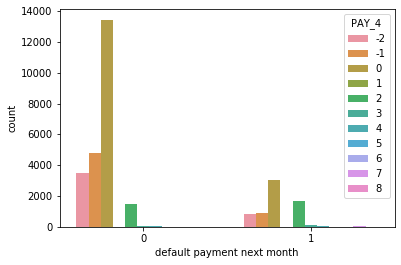

In [22]:
sns.countplot(df['default payment next month'],hue=df['PAY_4'])

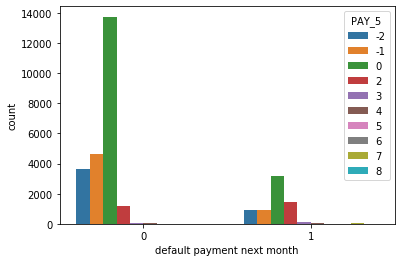

In [23]:
sns.countplot(df['default payment next month'],hue=df['PAY_5'])

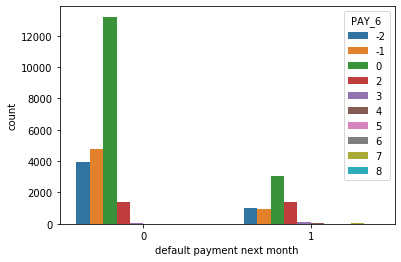

In [24]:
sns.countplot(df['default payment next month'],hue=df['PAY_6'])

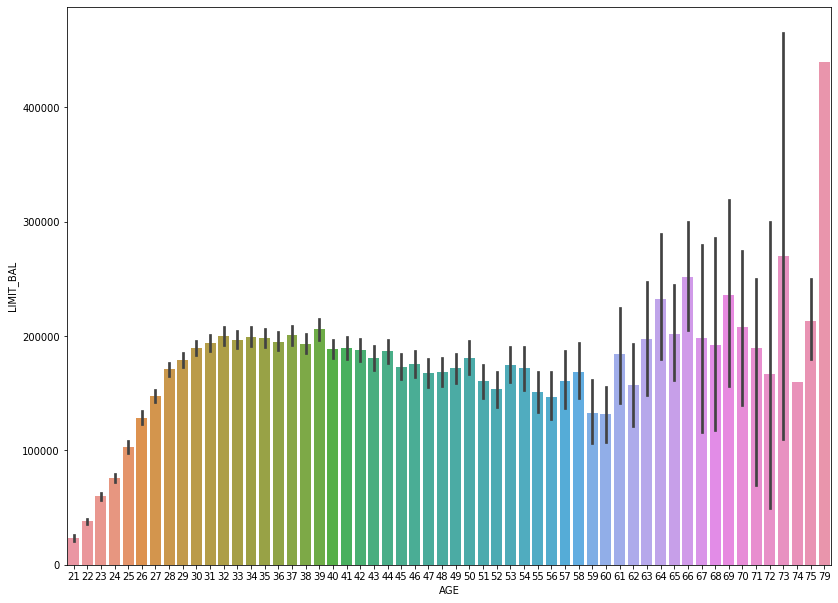

In [25]:
fig, ax = plt.subplots()
fig.set_size_inches(13.7, 10.27)
sns.barplot(df['AGE'],df['LIMIT_BAL'])

#Correlation Analysis

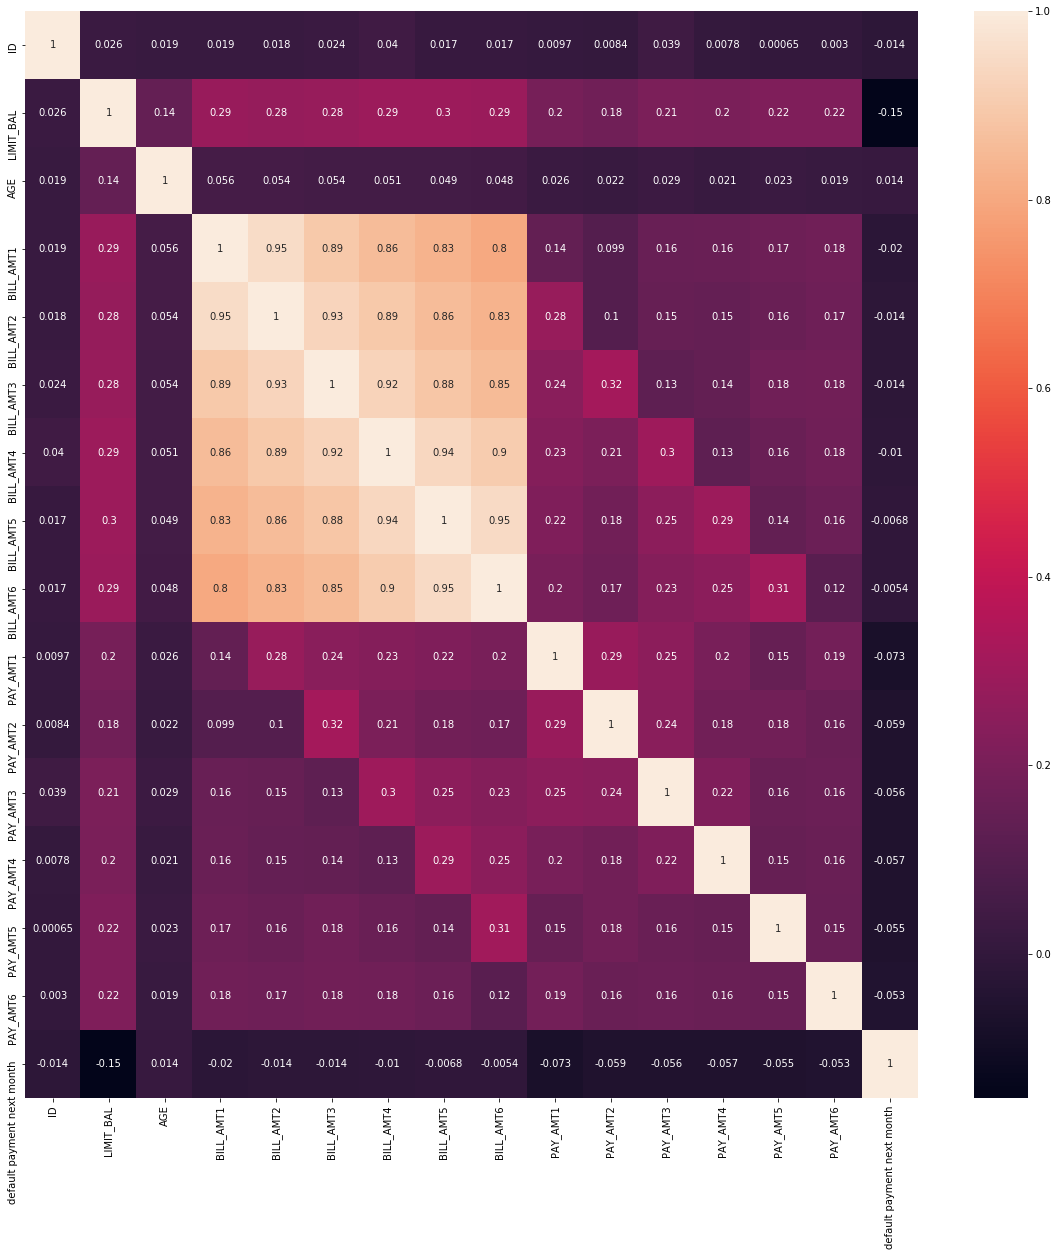

In [26]:
fig,ax= plt.subplots()
fig.set_size_inches(20,20)
sns.heatmap(df.corr(), annot=True)

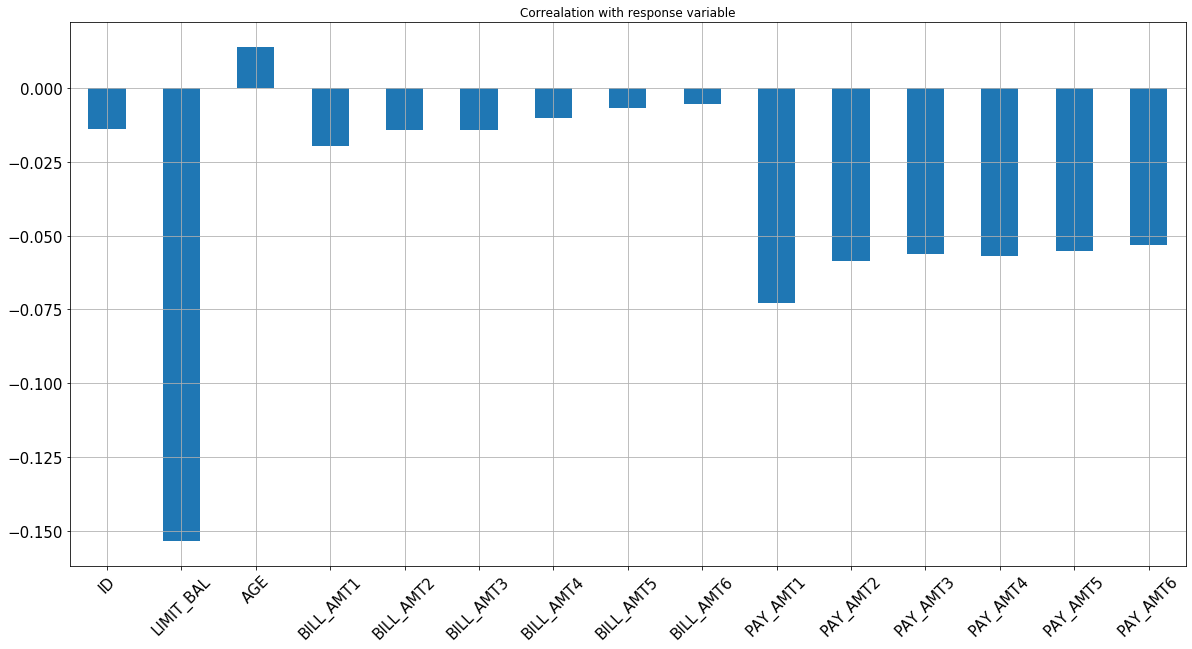

In [27]:
X=df.drop('default payment next month',axis=1)
Y=df['default payment next month']
X.corrwith(Y).plot.bar(figsize=(20,10),
                                           title="Correalation with response variable",
                                           fontsize=15,rot=45,grid=True)

In [31]:
df2=df.drop(['ID','MARRIAGE','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5'],axis=1)

In [32]:
#splitting data_set
train, val, test = train_validate_test_split(df2);

In [33]:
# Sort validation set for plots
val = val.sort_values(by=target)

In [34]:
#dividing variables
X_train = train.drop('default payment next month',axis=1)
Y_train = train['default payment next month']
X_val = val.drop('default payment next month',axis=1)
Y_val = val['default payment next month']
X_test = test.drop('default payment next month',axis=1)
Y_test = test['default payment next month']

In [35]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_tr = sc.fit_transform(X_train)
X_v = sc.fit_transform(X_val)
X_te = sc.fit_transform(X_test)

In [36]:
# model Building

table = PrettyTable()
table.field_names = ["Model", "Mean Squared Error", "R² score"]

models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor( random_state=0, n_estimators=300)
]

for model in models:
    model.fit(X_tr , Y_train) 
    Y_res = model.predict(X_v)

    mse = mean_squared_error(Y_val, Y_res)
    score = model.score(X_v , Y_val)    

    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)

+-----------------------+--------------------+----------+
|         Model         | Mean Squared Error | R² score |
+-----------------------+--------------------+----------+
|      SGDRegressor     |        0.15        |   0.13   |
|         Lasso         |        0.16        |   0.05   |
|       ElasticNet      |        0.17        |  -0.00   |
|         Ridge         |        0.15        |   0.13   |
|          SVR          |        0.17        |   0.02   |
|          SVR          |        0.14        |   0.16   |
|    BaggingRegressor   |        0.16        |   0.08   |
|    BaggingRegressor   |        0.15        |   0.12   |
|         NuSVR         |        0.16        |   0.06   |
| RandomForestRegressor |        0.14        |   0.18   |
+-----------------------+--------------------+----------+


In [37]:
# Decision tree
# Model Training
clf_tree=DecisionTreeClassifier()
clf_tree.fit(X_tr,Y_train)
Y_pred=clf_tree.predict(X_te)

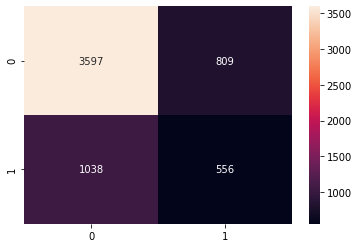

In [38]:
#Confusion Matrix
cm=confusion_matrix(Y_pred,Y_test)
sns.heatmap(cm,annot=True,fmt='d')

In [39]:
# Accuracy
ac=accuracy_score(Y_pred,Y_test)
ac

0.6921666666666667

In [40]:
# Model Tuning
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
clf_tree=DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters)
clf.fit(X_tr,Y_train)
y_pred=clf.predict(X_te)

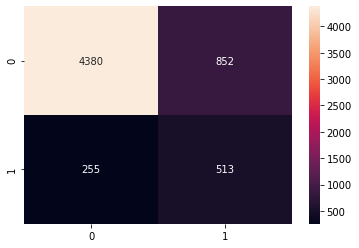

In [43]:
# Confusion Matrix
cm2=confusion_matrix(y_pred,Y_test)
sns.heatmap(cm2,annot=True,fmt='d')

In [42]:
# Accuracy
ac2=accuracy_score(y_pred,Y_test)
ac2

0.8155